In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Recap from before:

Beliefs(prior, likelihood, posterior) are probability distributions. Let $H$ be the space of hypotheses. $P(H)$ is the _prior_, the beliefs we hold before we see the data. $P(D|H)$ is the _likelihood_, the distribution on the data, that tells us how well each hypothesis $H$ matches observed data $D$. $P(H|D)$ is the posterior, or beliefs we should have about the hypothesis after seeing the data. 

Bayes' Rule states $P(H|D) = \frac{P(H) P(D|H)}{P(D)}$

It's hard to compute $P(D)$ when you have an infinite hypothesis space, because $P(D) = \sum_{\forall h \in H}P(D|H) P(H)$.

In log form: $\log P(H|D) = \log P(H) + \log P(D|H) - \log P(D)$, where we alternatively call $P(D)$ some constant.

_Samplers_ allow us to accomplish the following. Instead of explicitly writing out all the hypotheses in our space, we deal with a _collection of samples_ from the posterior distribution. Formally, this is $X_i \text{~} P(H|D)$.
This is important because when we're estimating a numerical value, we have to assume a continuous hypothesis space.

The BIG MIRACLE- you can sample from the posterior distribution without knowing $P(D)!$


## The Metropolis (Hastings) Algorithm

We infer the mean of a distribution from only three samples! Our hypothesis space is the set of real numbers, and we assume a Gaussian prior: $P(H) \text{~} Normal(\mu = 0, \sigma = 10)$. This means that our likelihood would be $P(D|H) \text{~} Normal(\mu = H, \sigma = 10)$

In [16]:
data = np.array([3.2, 5.6, 3.1])
m = 0
sd = 10

In [24]:
def log_posterior(h, d):
    log_prior = stats.norm.logpdf(h, m, sd)
    log_likelihood = stats.norm.logpdf(d, m, sd) #this outputs an array of probabilities for each item in d
    return log_prior + sum(log_likelihood)

**The Algorithm**

Let $h$ be a sample from the prior distribution. During each iteration, we are trying to find a "more suitable" value of $h$. We propose a new value, $h'$, and if $P(h'|D) > P(h|D)$, $h'$ is our new estimate. There's a chance that even if it's less likely than the posterior under the current $h$ value, it could lead to better results in the future, so we accept it with probability $\displaystyle \frac{P(h'|D)}{P(h|D)}$. Otherwise, we stay on $h$.

In [42]:
samples = []
h = np.random.normal(m, sd)
for i in np.arange(100000):
    # Standing on h
    # Propose some new h'
    # If P(h'|D) > P(h|D), then always accept
    # or accept anyways with probability P(h'|D)/P(h|D)
    # otherwise, stay on h
    h_prime = np.random.normal(h, 1)    
    h_pos = log_posterior(h, data)
    h_prime_pos = log_posterior(h_prime, data)
    
    if (h_prime_pos > h_pos) or (np.random.uniform(0, 1) < np.exp(h_prime_pos - h_prime)):
        #if higher probability or a random number is below the acceptance ratio, update h to h'
        h = h_prime
    #else keep h
    samples.append(h)

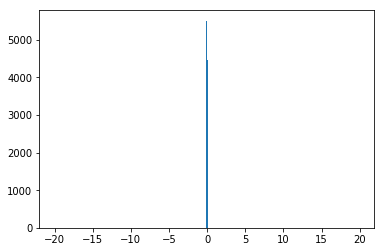

In [46]:
histogram = plt.hist(samples, bins = np.arange(-20, 20, 0.1))

We estimate the mean at 0 based on the simulation.

## Important Ideas
### Detailed Balance
Let there be two regions, A and B. M(A->B) is the probability the algorithm moves from A to B. IN(A) is the probability that the algorithm is in region A. We achieve detailed balance when IN(A) M(A->B) = IN(B) M(B->A). 
$IN(A) \propto P(A|D)$

***Burn-In*** tossing the first few (1000-odd) samples

Use multiple runs (chains) of the Metropolis algorithm and take diagnostics [clarify?]

### Exercise
H - (-inf,+inf) for a mean AND some (0,+inf) for a SD

samples - won't be an array, it'll be two columns (one for mean, one for SD)

when you propose, you can flip a coin to decide whether to propose to the mean or the SD

assume some prior on SD (e.g. ~ Exponential(1))

never accept negative proposals to SD
